In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import seaborn as sns
    sns.set_style("ticks") 
    #sns.set_style({"axes.axisbelow": False})
    sns.set_style({"xtick.direction": "in" ,"ytick.direction": "in"})
except:
    print("sns problem")

plt.rcParams.update({'font.size': 14})

#from matplotlib.patches import Circle

    

In [2]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord, Angle
from regions import CircleSkyRegion



In [3]:
#185.341428 30.176989 0.3 1ES1218+304
#184.467 30.1168 0.3 1ES1215+303

def plot_sigMap(fits_image_filename = "./results_lowest_w_tcut_s6.fits",
                outfile="Skymap_1215_lowest.png", figsize=[7,6],
                draw_circle_RAs=[185.341428, 184.467], 
                draw_circle_Decs=[30.176989, 30.1168],
                draw_circle_radi=[0.3,0.3],vmax=5, ):
    
    hdul = fits.open(fits_image_filename)
    sigMap = hdul['SignificanceMap']
    sigMapData = sigMap.data

    wcs = WCS(sigMap.header)

    #fig, ax = 
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection=wcs)
    #ax = plt.subplot(projection=wcs, figsize=figsize)

    #plt.imshow(sigMapData, origin='lower', vmax=5, extent=[xs[0], xs[-1], ys[0], ys[-1]])
    this_map = ax.imshow(sigMap.data, origin='lower', vmax=vmax, #vmin=-4,
                        )
    #ax.contour(sigMap.data, colors='white', alpha=0.5, levels=[1,3,5] )#np.logspace(0, 0.7, 2))
    #ax.contour(sigMap.data, colors='b', alpha=0.3, levels=[5] )

    cbar = fig.colorbar(this_map, ax=ax)
    
    for ra_, dec_, rad_ in zip(draw_circle_RAs, draw_circle_Decs, draw_circle_radi):
        coord_ = SkyCoord( ra_, dec_, frame='icrs', unit='deg')
        radius = Angle(rad_, 'deg')
        region1 = CircleSkyRegion(coord_, radius)
        pix_region1 = region1.to_pixel(wcs=wcs)
        pix_region1.plot(ax=ax, edgecolor='w', facecolor='w', alpha=0.5, lw=2)




    plt.xlabel("RA [deg]")
    plt.ylabel("Dec [deg]")
    cbar.set_label(r'Significance [$\sigma$]')#,size=18)

    plt.subplots_adjust(bottom=0.2, left=0.05)


    #plt.tight_layout()
    #plt.savefig("Skymap_1215_lowest_contour.png")

    plt.savefig(outfile, dpi=300)





In [4]:
fits_image_filename = "./results_hs_1215_v1_s6.fits"
hdul = fits.open(fits_image_filename)
sigMap = hdul['SignificanceMap']
sigMapData = sigMap.data

wcs = WCS(sigMap.header)



the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


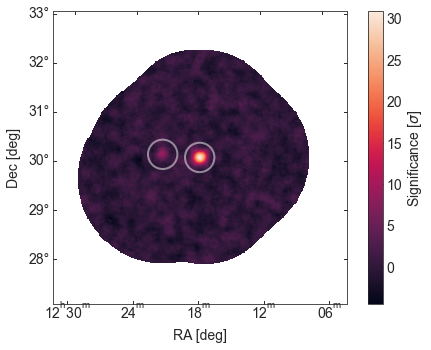

In [5]:
plot_sigMap(fits_image_filename = "./results_hs_1215_v1_s6.fits",
                outfile="Skymap_1215_high_state.png", 
                draw_circle_RAs=[185.341428, 184.467], 
                draw_circle_Decs=[30.176989, 30.1168],
                draw_circle_radi=[0.3,0.3],vmax=None)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


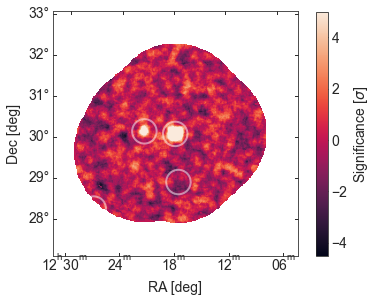

In [6]:
plot_sigMap(fits_image_filename = "./results_hs_1215_v1_s6.fits",
                outfile="Skymap_1215_high_state_max5sig.png", figsize=[6,5],
                draw_circle_RAs=[185.341428, 184.467, 184.377395,186.734467], 
                draw_circle_Decs=[30.176989, 30.1168, 28.937191, 28.268423],
                draw_circle_radi=[0.3,0.3,0.3,0.3],vmax=5)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


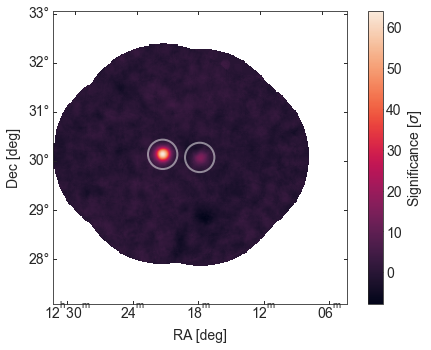

In [7]:
plot_sigMap(fits_image_filename = "./results_ls_1215_all_s6.fits",
                outfile="Skymap_1215_low_state.png", 
                draw_circle_RAs=[185.341428, 184.467], 
                draw_circle_Decs=[30.176989, 30.1168],
                draw_circle_radi=[0.3,0.3],vmax=None)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


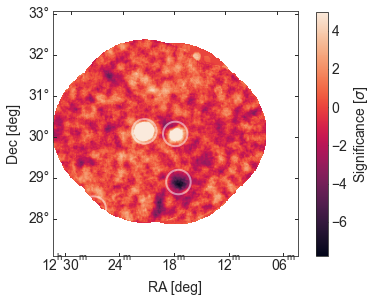

In [8]:
plot_sigMap(fits_image_filename = "./results_ls_1215_all_s6.fits",
                outfile="Skymap_1215_low_state_max5sigma.png", figsize=[6,5],
                draw_circle_RAs=[185.341428, 184.467, 184.377395,186.734467], 
                draw_circle_Decs=[30.176989, 30.1168, 28.937191, 28.268423],
                draw_circle_radi=[0.3,0.3,0.3,0.3],vmax=5)

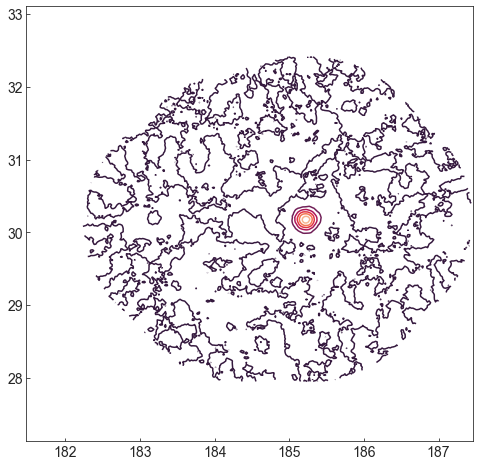

In [9]:
fits_image_filename = "./results_lowest_w_tcut_s6.fits"
hdul = fits.open(fits_image_filename)

sigMap = hdul['SignificanceMap']
sigMapData = sigMap.data

hd = sigMap.header

nx = hd.get('NAXIS1')
ny = hd.get('NAXIS2')

xc = hd.get('CRVAL1')
xin = hd.get('CDELT1')
xcpix = int(hd.get('CRPIX1'))


yc = hd.get('CRVAL2')
yin = hd.get('CDELT2')
ycpix = int(hd.get('CRPIX2'))


#= hd.get('')


xs = np.arange(xc-(xcpix-1)*xin, xc+(nx-xcpix+1)*xin, xin)
ys = np.arange(yc-(ycpix-1)*yin, yc+(ny-ycpix)*yin, yin)


X, Y = np.meshgrid(xs, ys)



fig = plt.figure(figsize=(8,8))
plt.contour(X, Y, sigMapData)
            